<a href="https://colab.research.google.com/github/tciodaro/GRLCDDR1C1-N2-L2-PB/blob/main/preprocessamento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import pandas as pd



fname = 'drive/MyDrive/Curso Projeto de Bloco: Inteligência Artificial e Machine Learning (GRLCDDR1C1-N2-L2)/dataset_vinhos.csv'



In [2]:

wine = pd.read_csv(fname, sep=';')
wine


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target,target_label,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0,baixa qualidade,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0,baixa qualidade,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0,baixa qualidade,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1,alta qualidade,red
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,0,baixa qualidade,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5315,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,1,alta qualidade,white
5316,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,0,baixa qualidade,white
5317,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,1,alta qualidade,white
5318,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,1,alta qualidade,white


In [22]:
from sklearn.model_selection import train_test_split

# wine.shape
wine['target-type'] = wine['target_label'] + ' ' + wine['type']
trn, tst = train_test_split(wine, test_size=0.2, stratify=wine['target-type'], random_state=42)



<Axes: ylabel='Frequency'>

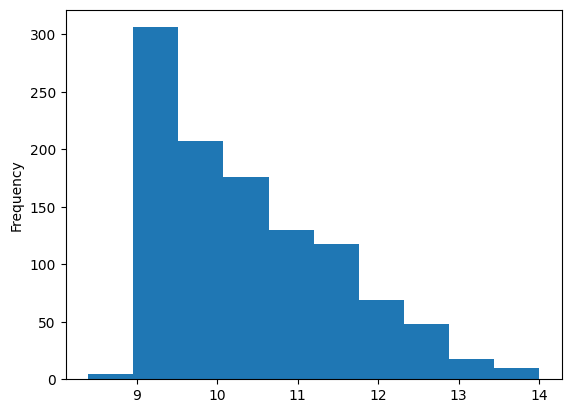

In [29]:
trn[trn['type']=='red'].alcohol.plot.hist()


<Axes: ylabel='Frequency'>

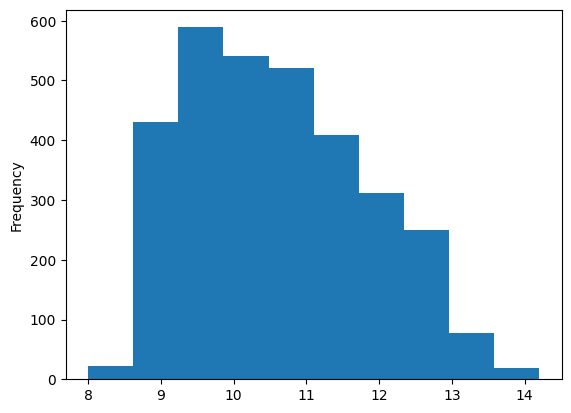

In [30]:
trn[trn['type']=='white'].alcohol.plot.hist()


<Axes: ylabel='Frequency'>

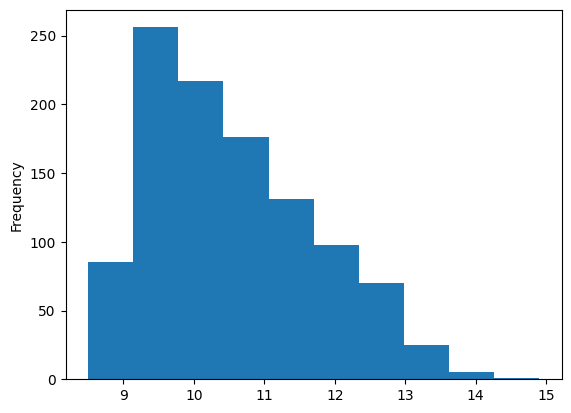

In [28]:
tst.alcohol.plot.hist()


# Transformação dos Dados

In [66]:
from sklearn import preprocessing

feature_list = [
    'pH',	'sulphates',	'alcohol'
]

scaler = preprocessing.StandardScaler()
# scaler = preprocessing.MinMaxScaler()
# scaler = preprocessing.QuantileTransformer()
scaler = scaler.fit(trn[feature_list])

norm_trn = scaler.transform(trn[feature_list])

norm_tst = scaler.transform(tst[feature_list])

In [58]:
norm_trn.max(axis=0)

array([1., 1., 1.])

In [70]:
norm_trn.mean(axis=0)

array([-8.73570222e-16,  1.38569190e-16, -1.05846827e-15])

In [71]:
norm_tst.mean(axis=0)

array([-0.01060504,  0.0541241 , -0.02160945])

In [61]:
norm_trn.std(axis=0)

array([0.28869243, 0.28864239, 0.28862533])

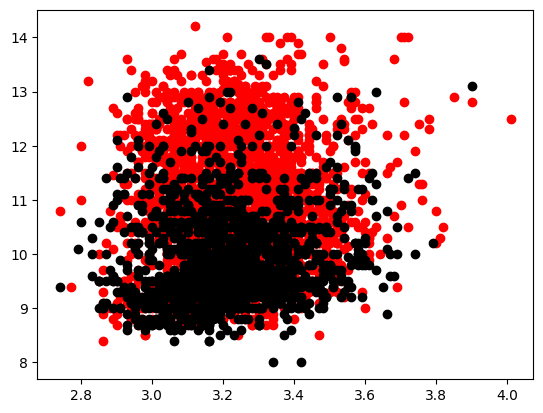

In [63]:
import matplotlib.pyplot as plt


idx = trn['target'] == 1
plt.plot(trn[idx][feature_list[0]], trn[idx][feature_list[2]], 'ro')

idx = trn['target'] == 0
plt.plot(trn[idx][feature_list[0]], trn[idx][feature_list[2]], 'ko')



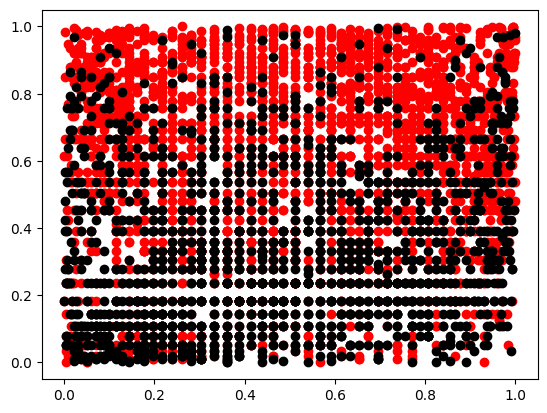

In [65]:
import matplotlib.pyplot as plt


idx = trn['target'] == 1
plt.plot(norm_trn[idx, 0], norm_trn[idx,2], 'ro')

idx = trn['target'] == 0
plt.plot(norm_trn[idx,0], norm_trn[idx, 2], 'ko')



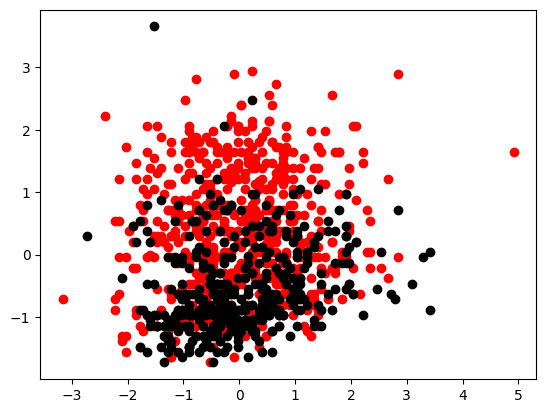

In [69]:

import matplotlib.pyplot as plt


idx = tst['target'] == 1
plt.plot(norm_tst[idx, 0], norm_tst[idx,2], 'ro')

idx = tst['target'] == 0
plt.plot(norm_tst[idx,0], norm_tst[idx, 2], 'ko')

